In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# games w/ pairs

# pairs of tracks at close proximity

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [2]:
MCbnbMCcosmicPairsFV, MCbnbMCcosmicSamples = load_MCbnbMCcosmicSamples()

138749 pairs from MC-BNB + cosmic MC overlay
95676 pairs in FV
19573 are 1mu-1p, 20.5%
16269 are other pairs, 17.0%
59944 are cosmic, 62.7%
--------------------------------------------------------------
7561 are CC 1p 0pi, 7.9%


In [5]:
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers = apply_cuts()

# $PID_a$ for cosmic muons vs. muons from the neutrino interaction: this is valid only for MC/MC overlay

In [20]:
muons_from_beam = MCbnbMCcosmicSamples['1mu-1p'][MCbnbMCcosmicSamples['1mu-1p']['pdg_long']==13]
muons_from_cosmic = MCbnbMCcosmicSamples['cosmic'][MCbnbMCcosmicSamples['cosmic']['pdg_long']==13]

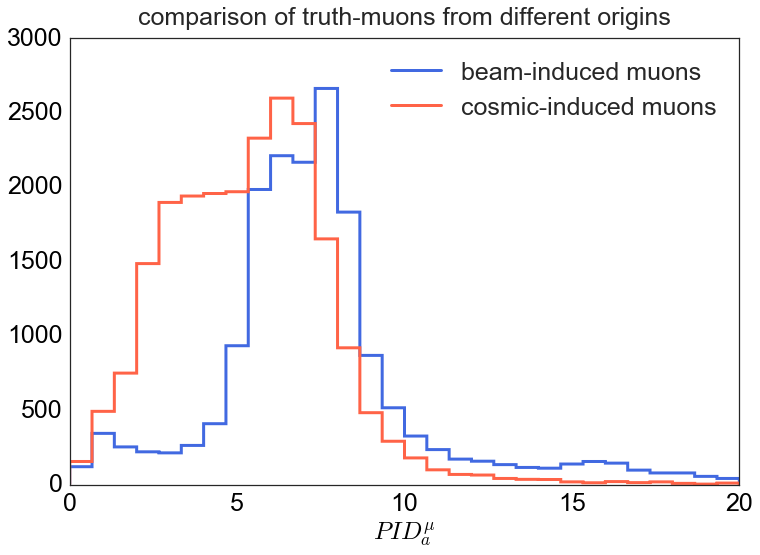

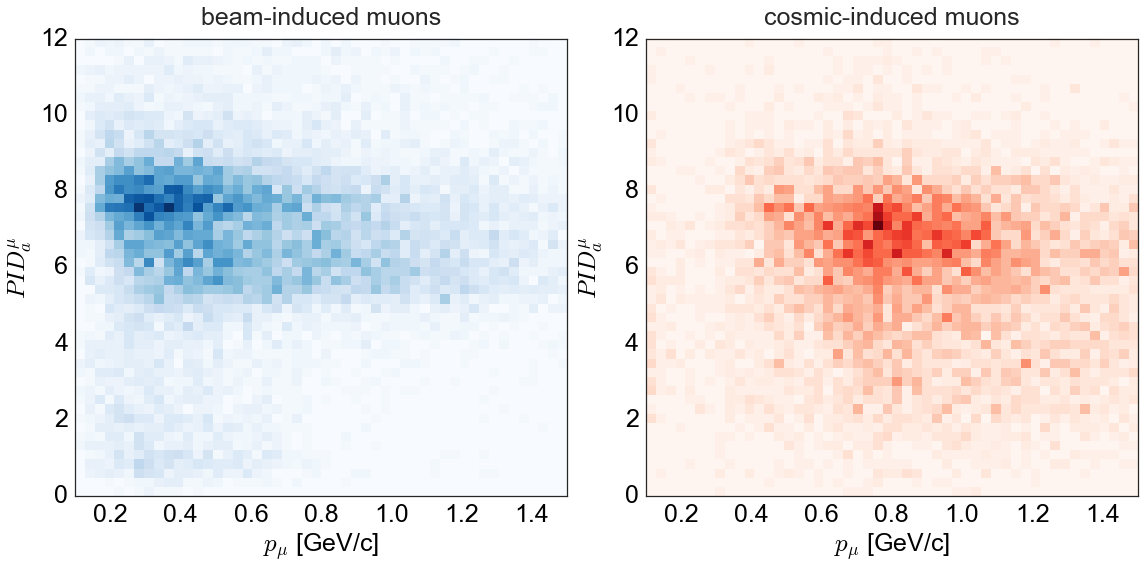

In [37]:
fig,ax=plt.subplots(figsize=(12,8))
bins=np.linspace(0,20,31)
for sample,color,label in zip([muons_from_beam,muons_from_cosmic]
                              ,['royalblue','tomato']
                              ,['beam-induced muons','cosmic-induced muons']):
    plt.hist(sample['PIDa_assigned_muon'],bins=bins,histtype='step',color=color,linewidth=3)
    plt.plot([0,0],[0,0],color=color,linewidth=3,label=label)
set_axes(ax,r'$PID_a^{\mu}$',do_add_legend=True,title='comparison of truth-muons from different origins')

fig=plt.figure(figsize=(16,8))
bins=(np.linspace(0.1,1.5,51),np.linspace(0,12,51))
for i,(sample,cmap,label) in enumerate(zip([muons_from_beam,muons_from_cosmic]
                                          ,['Blues','Reds']
                                          ,['beam-induced muons','cosmic-induced muons'])):
    ax = fig.add_subplot(1,2,i+1)
    plt.hist2d(sample['truth_Pmu'],sample['PIDa_assigned_muon'],bins=bins,cmap=cmap)
    set_axes(ax,r'$p_{\mu}$ [GeV/c]',r'$PID_a^{\mu}$',do_add_legend=True,title=label)
plt.tight_layout()

# $\Delta \phi$

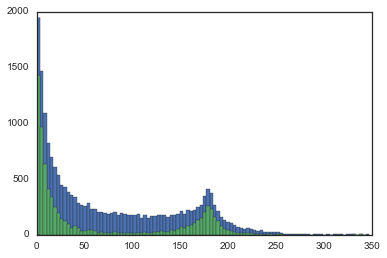

In [6]:
sam = MCbnbMCcosmicSamples['1mu-1p']
plt.hist(sam['delta_phi'],bins=100);
sam = MCbnbMCcosmicSamples['CC 1p 0pi']
plt.hist(sam['delta_phi'],bins=100);

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

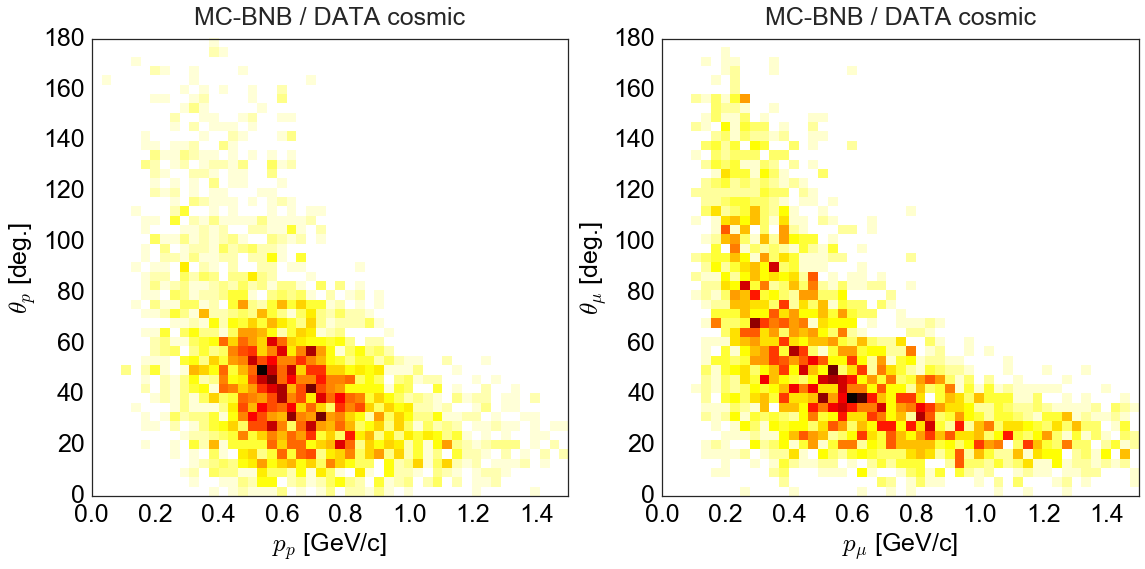

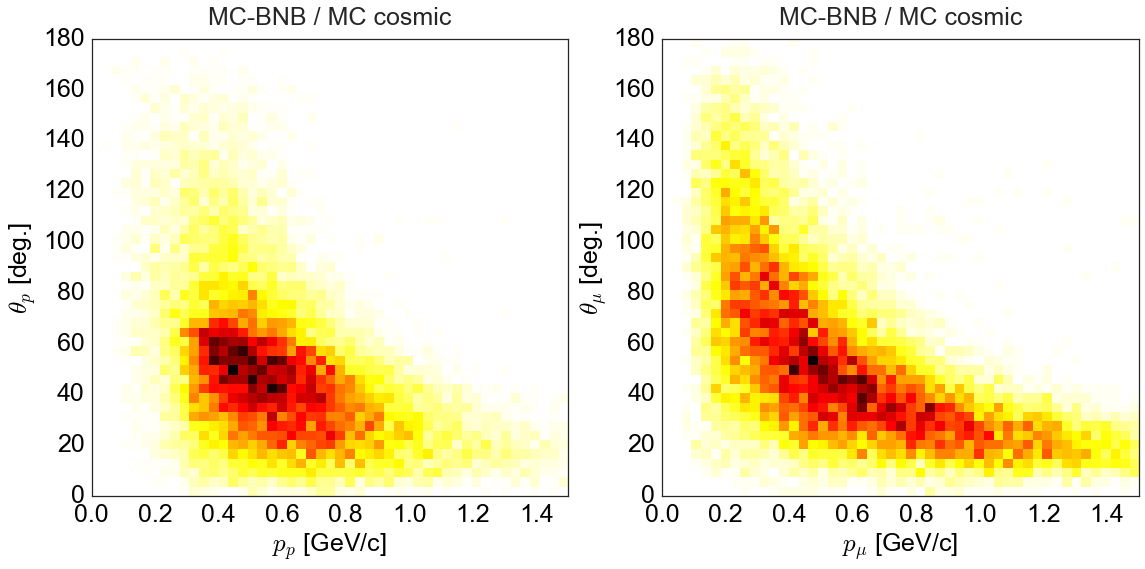

In [17]:
sam = MCbnbDATAcosmicSamples['1mu-1p']
sam['truth_Pp_theta'] = np.arccos( sam['truth_Pp_z'] / sam['truth_Pp'] )
sam['truth_Pmu_theta'] = np.arccos( sam['truth_Pmu_z'] / sam['truth_Pmu'] )

fig = plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
plot_2d_hist(sam['truth_Pp'],180/np.pi*sam['truth_Pp_theta'],bins=(np.linspace(0,1.5,50),np.linspace(0,180,50)),ax=ax);
set_axes(ax,r'$p_p$ [GeV/c]',r'$\theta_p$ [deg.]',title='MC-BNB / DATA cosmic')
ax=fig.add_subplot(1,2,2)
plot_2d_hist(sam['truth_Pmu'],180/np.pi*sam['truth_Pmu_theta'],bins=(np.linspace(0,1.5,50),np.linspace(0,180,50)),ax=ax);
set_axes(ax,r'$p_\mu$ [GeV/c]',r'$\theta_\mu$ [deg.]',title='MC-BNB / DATA cosmic')
plt.tight_layout()


sam = MCbnbMCcosmicSamples['1mu-1p']
sam['truth_Pp_theta'] = np.arccos( sam['truth_Pp_z'] / sam['truth_Pp'] )
sam['truth_Pmu_theta'] = np.arccos( sam['truth_Pmu_z'] / sam['truth_Pmu'] )

fig = plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
plot_2d_hist(sam['truth_Pp'],180/np.pi*sam['truth_Pp_theta'],bins=(np.linspace(0,1.5,50),np.linspace(0,180,50)),ax=ax);
set_axes(ax,r'$p_p$ [GeV/c]',r'$\theta_p$ [deg.]',title='MC-BNB / MC cosmic')
ax=fig.add_subplot(1,2,2)
plot_2d_hist(sam['truth_Pmu'],180/np.pi*sam['truth_Pmu_theta'],bins=(np.linspace(0,1.5,50),np.linspace(0,180,50)),ax=ax);
set_axes(ax,r'$p_\mu$ [GeV/c]',r'$\theta_\mu$ [deg.]',title='MC-BNB / MC cosmic')
plt.tight_layout()


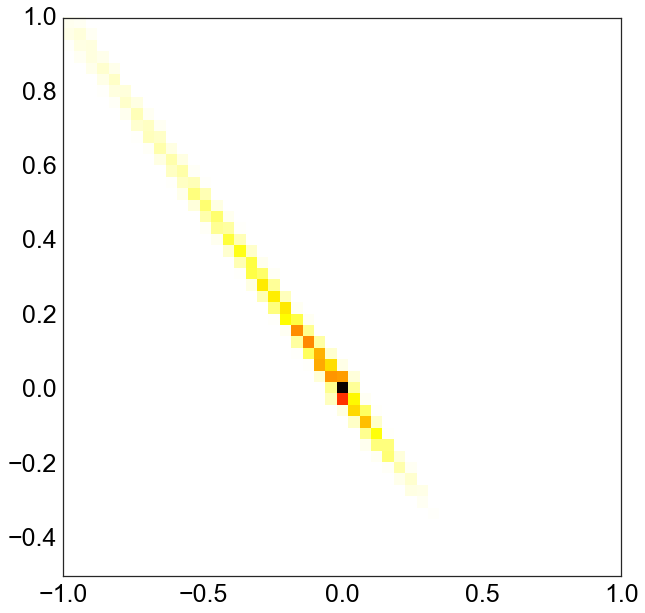

In [11]:
sample = MCbnbMCcosmicSamples['1mu-1p']
# plot_2d_hist(sample['reco_Pmu_z'],sample['truth_Pmu_z'],bins=(np.linspace(-1.,1.,50),np.linspace(-.5,1.,50)));
flipped_muons = sample[np.abs(sample['reco_Pmu_z'] + sample['truth_Pmu_z']) < 0.05]
plot_2d_hist(flipped_muons['reco_Pmu_z'],flipped_muons['truth_Pmu_z'],bins=(np.linspace(-1.,1.,50),np.linspace(-.5,1.,50)));

# $p_t$ vs. $p_{miss}$

In [2]:
# small_overlay_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_vertices.csv')
small_overlay_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_vertices.csv')



In [3]:
samples = dict()
samples['1mu-1p'] = small_overlay_sample[small_overlay_sample['1mu-1p']==True]
samples['CC 1p 0pi'] = small_overlay_sample[small_overlay_sample['CC 1p 0pi']==True]

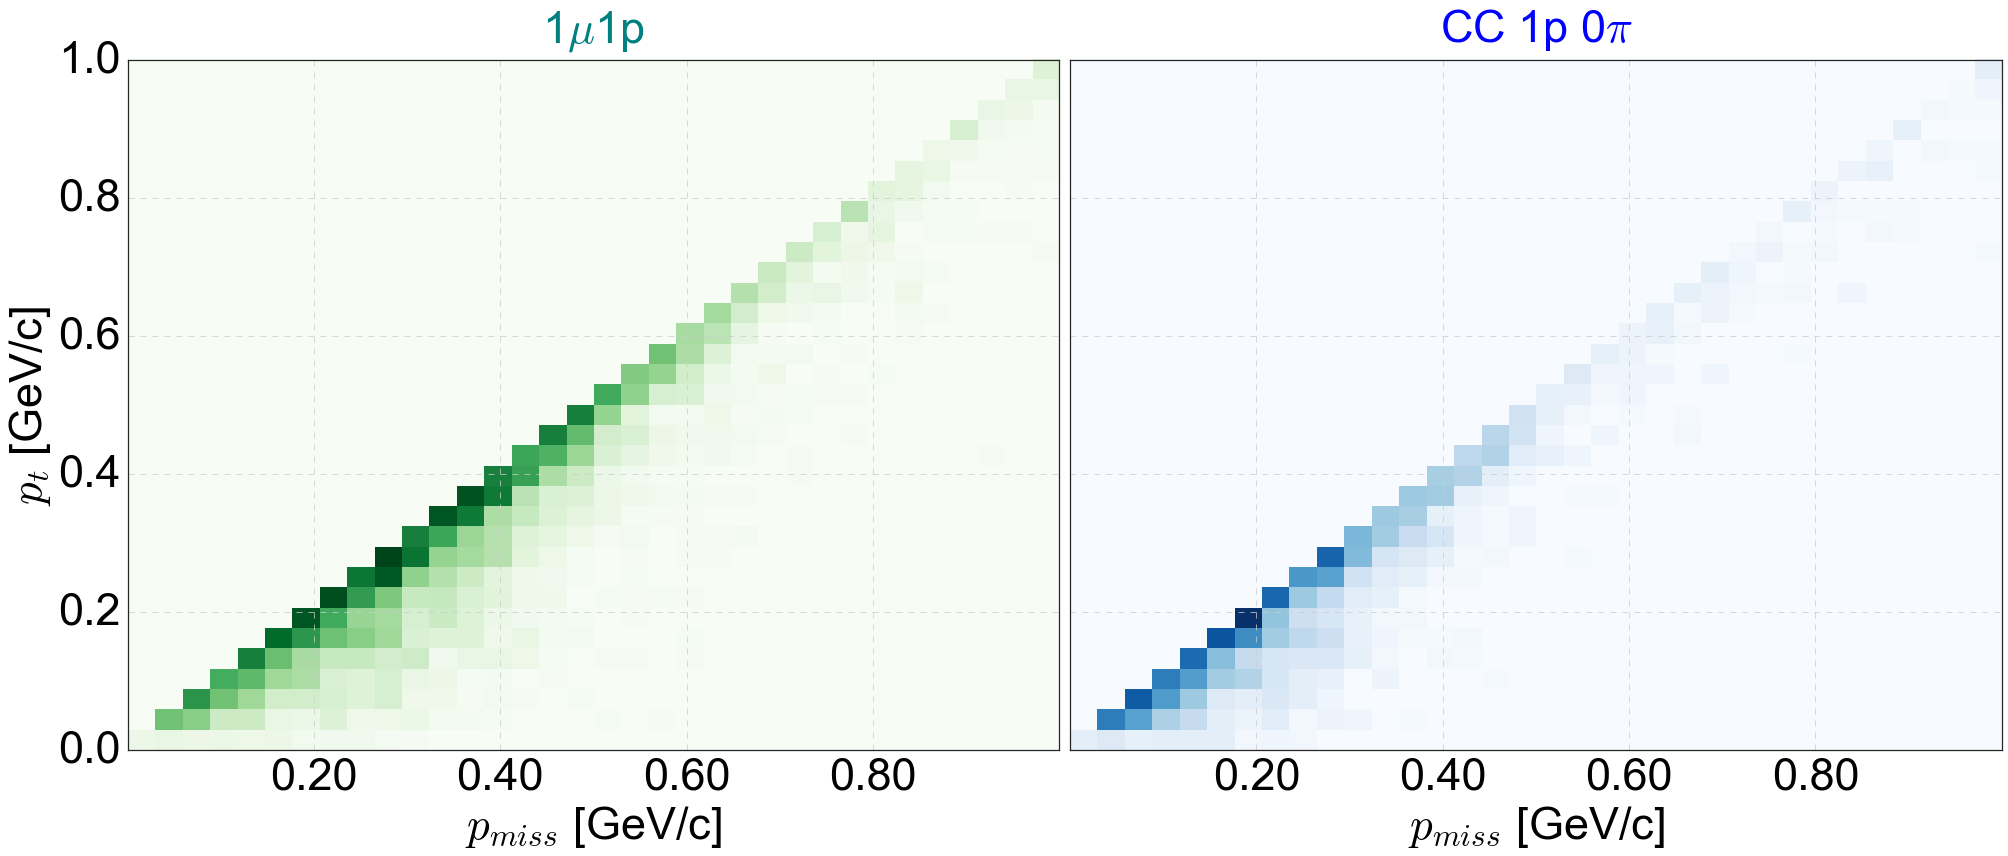

In [4]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,1.0,35),np.linspace(0,1.0,35))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sam = samples[pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sam['reco_Pmiss'], 
                 sam['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=r'$p_{miss}$ [GeV/c]', y_label=r'$p_{t}$ [GeV/c]' if i==0 else ''
             ,xticks=[0.2,0.4,0.6,0.8]
             ,fontsize=45,do_add_grid=True)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/Pmiss_vs_Pt.pdf')

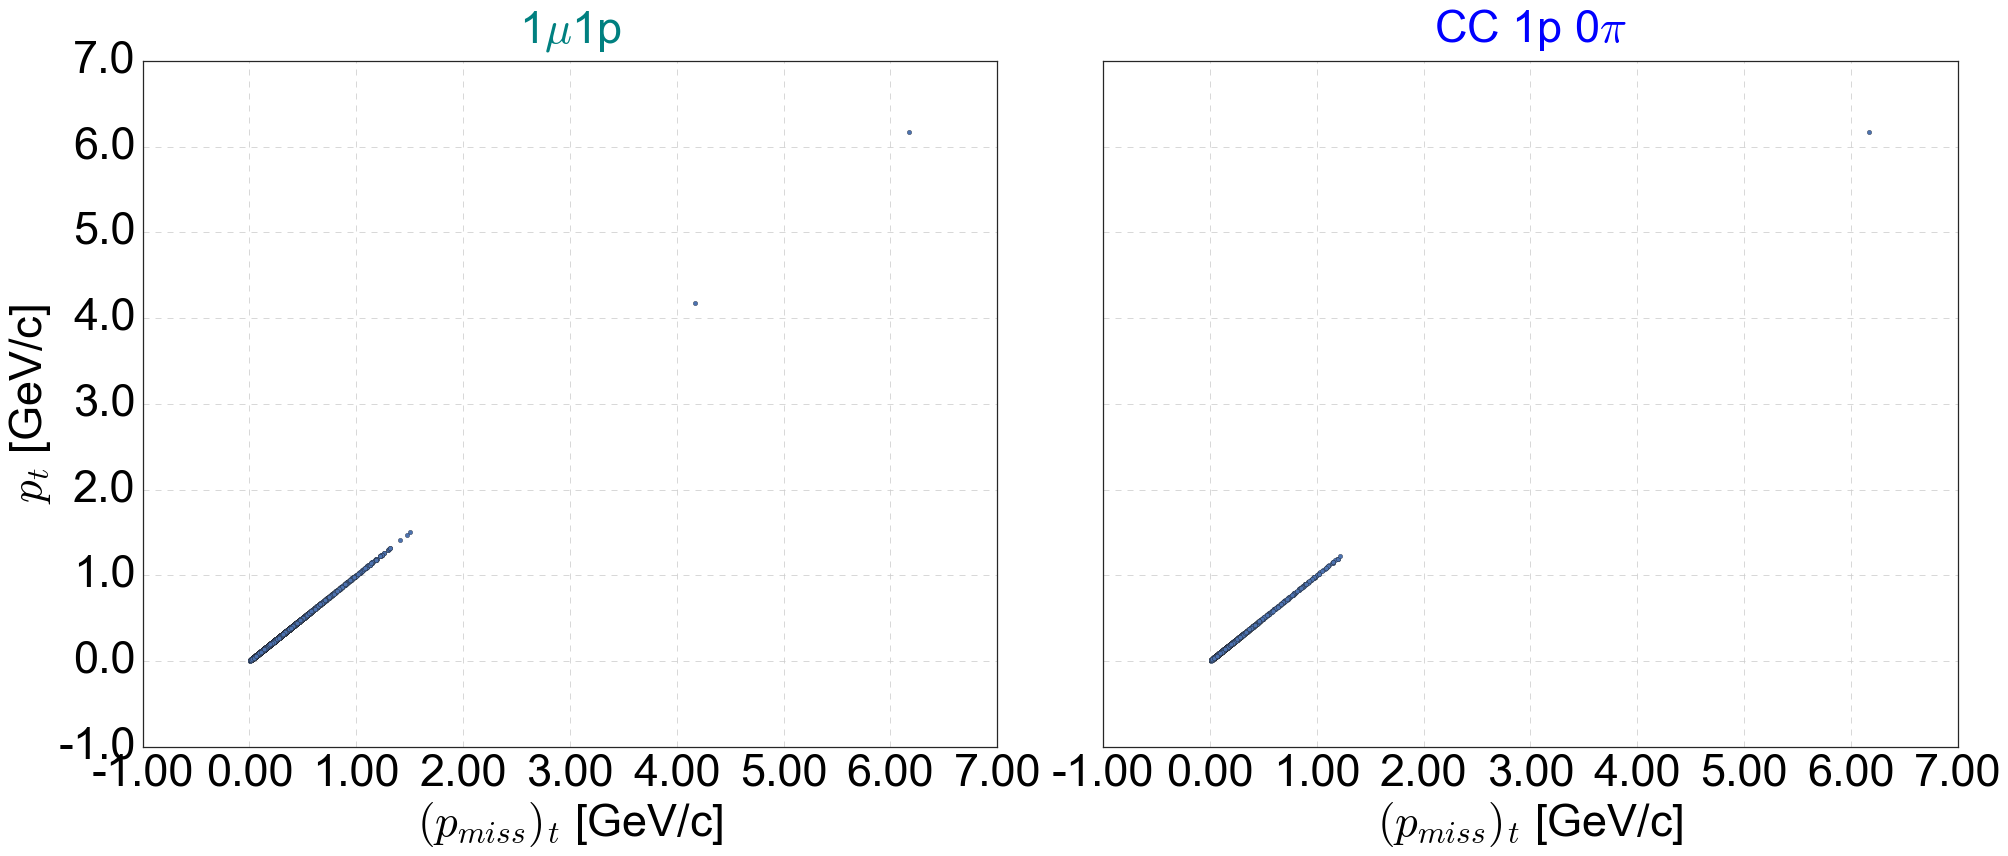

In [48]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,1.0,35),np.linspace(0,1.0,35))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sam = samples[pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.scatter(sam['reco_Pmiss_t'], 
                 sam['reco_Pt'])
#     plot_2d_hist(sam['reco_Pmiss_t'], 
#                  sam['reco_Pt'],
#                  ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=r'$(p_{miss})_t$ [GeV/c]', y_label=r'$p_{t}$ [GeV/c]' if i==0 else ''
#              ,xticks=[0.5,1.,1.5,2.]
             ,fontsize=45,do_add_grid=True)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()



# new sample

In [3]:
new_samlpe = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8.4_reco2_vertices.csv')

In [6]:
new_samlpe['pdg_long']

0    -9999
1    -9999
2    -9999
3    -9999
4    -9999
5    -9999
6    -9999
7    -9999
8    -9999
9    -9999
10   -9999
11   -9999
12   -9999
13   -9999
14   -9999
15   -9999
16   -9999
17   -9999
Name: pdg_long, dtype: int64